In [1]:
import numpy as np
import pandas as pd
import yfinance as yf


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('asset_returns.csv', names=[i for i in range(83)])
daily_returns = df.fillna(0)
daily_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.005763,-0.026772,-0.087660,0.026042,-0.003650,-0.074595,-0.057377,-0.084338,-0.084821,0.081127,...,-0.049128,-0.094203,0.000000,-0.083417,0.109715,-0.025634,0.015899,-0.014392,0.042297,-0.010116
1,0.058059,0.113269,0.175373,0.096116,0.076657,0.120327,0.010870,0.102639,0.154634,0.130871,...,-0.029639,0.160000,-0.083081,-0.021158,-0.019817,0.030551,-0.021737,0.003431,0.004292,-0.065693
2,-0.037039,0.035610,-0.026984,-0.077318,-0.144086,-0.012513,-0.053763,-0.031031,-0.013519,-0.117281,...,-0.014870,-0.006897,-0.178512,0.004320,-0.009998,-0.049396,0.000881,-0.068494,-0.036105,0.003123
3,0.055546,-0.002807,0.093801,0.044626,0.089131,0.062302,0.011364,0.067736,0.018844,0.013110,...,0.052459,-0.055556,-0.051674,0.058668,-0.050943,0.096973,0.014222,0.087317,0.034290,0.004675
4,0.037787,0.035890,0.021626,0.163150,0.064524,0.053678,0.024719,0.035753,-0.121480,0.033673,...,0.046823,0.077206,0.036358,0.023387,-0.172145,0.128671,0.077061,0.014368,0.068786,0.062015


In [3]:
## Annualized Returns ##
ann_return = (1 + daily_returns.mean()) ** 252 - 1
ann_return

0     0.109221
1     1.041751
2     0.156452
3     0.589051
4     0.538280
        ...   
78    2.250858
79    0.124696
80    0.993927
81    0.475868
82    3.028009
Length: 83, dtype: float64

In [4]:
ann_cov = daily_returns.cov() * 252
ann_cov

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.352285,0.080005,0.101054,0.132706,0.291935,0.160130,0.156497,0.145233,0.107555,0.311444,...,0.089630,0.188001,0.210873,0.245484,0.231083,0.127924,0.210941,0.099865,0.142575,0.091826
1,0.080005,0.180683,0.080064,0.085894,0.084008,0.092512,0.096894,0.096765,0.070723,0.090200,...,0.065314,0.077012,0.069905,0.061974,0.077953,0.053852,0.071213,0.061170,0.079922,0.063259
2,0.101054,0.080064,0.230269,0.118548,0.134789,0.102658,0.098517,0.113165,0.170741,0.153195,...,0.059316,0.103281,0.062767,0.073912,0.057044,0.049162,0.081140,0.065260,0.103262,0.052602
3,0.132706,0.085894,0.118548,0.328805,0.167342,0.117433,0.120606,0.128947,0.098404,0.177548,...,0.074651,0.125324,0.114611,0.120683,0.120896,0.105125,0.111750,0.088223,0.101315,0.092279
4,0.291935,0.084008,0.134789,0.167342,0.666094,0.187486,0.209231,0.175549,0.143857,0.448658,...,0.122414,0.280421,0.309605,0.441403,0.369090,0.224487,0.299605,0.169155,0.227289,0.172865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.127924,0.053852,0.049162,0.105125,0.224487,0.099774,0.127584,0.088909,0.030514,0.215818,...,0.077348,0.230611,0.193236,0.336683,0.269115,0.506552,0.166568,0.127690,0.157094,0.114403
79,0.210941,0.071213,0.081140,0.111750,0.299605,0.141116,0.159635,0.132540,0.075313,0.264755,...,0.110901,0.213128,0.221697,0.290242,0.294723,0.166568,0.396460,0.111271,0.175916,0.101342
80,0.099865,0.061170,0.065260,0.088223,0.169155,0.098703,0.087361,0.088779,0.062850,0.194750,...,0.042359,0.161701,0.133830,0.158569,0.175303,0.127690,0.111271,0.333929,0.104316,0.080921
81,0.142575,0.079922,0.103262,0.101315,0.227289,0.117890,0.145715,0.119521,0.089991,0.232881,...,0.081549,0.201637,0.184557,0.252930,0.182944,0.157094,0.175916,0.104316,0.353887,0.102561


Now we have our annualised returns and variance data, we can create variables useful in constructing our graph

In [5]:
daily_returns_IS = daily_returns.iloc[:100,:]
daily_returns_OOS = daily_returns.iloc[100:110]

In [6]:
mean_return = daily_returns_IS.mean().to_numpy().reshape(-1, 1)
daily_cov = daily_returns_IS.cov().to_numpy()
target_return = np.linspace(0, 0.1, 21)
e = np.ones(len(mean_return)).reshape(-1, 1)

In [7]:
res = []
for r_p in target_return:
    
    top_row = np.hstack((daily_cov, -mean_return, -e))
    middle_row = np.hstack((-mean_return.T, np.zeros((1, 1)), np.zeros((1, 1))))
    bottom_row = np.hstack((-e.T, np.zeros((1, 1)), np.zeros((1, 1))))

    A = np.vstack((top_row, middle_row, bottom_row))
    b = np.vstack((np.zeros((len(mean_return), 1)), -r_p, -1))

    # Solve the linear system
    try:
        x = np.linalg.solve(A, b)
        res.append(x.flatten())
    except np.linalg.LinAlgError as err:
        print(f"Cannot solve linear system for target return {r_p}: {err}")
        continue

results_df = pd.DataFrame(res, columns=[f"Asset {i+1}" for i in range(len(mean_return))] + ["Lambda", "Mu"])
results_df.set_index(target_return, inplace=True)

### Actual average returns, backtesting:

$ \overline{r}^\top w $ - actual average returns

$ w^\top \Sigma w^\top $ - portfolio covariance 

where $w$ denote the optimal portfolio, $\overline{r}$ denote the average return over
the out-of-sample period, and $\Sigma$ denote the out of sample covariance matrix.




In [8]:
mean_return_OOS = daily_returns_OOS.mean().to_numpy().reshape(-1, 1)
daily_cov_OOS = daily_returns_OOS.cov().to_numpy()
arr = results_df.to_numpy()

# Define a structured dtype
dtype = np.dtype([
    ('Target Return', np.float64),
    ('Actual Average Return', np.float64),
    ('Portfolio Covariance', np.float64),
    ('Weights+lagrangian', np.float64, (85,))  # Assuming weights has 5 elements
])

res = np.zeros(21, dtype=dtype)

for index, row in enumerate(arr):
    # print(f"Row {index}: {row}")
    weights = row[:-2]
    targ_ret = target_return[index]
    act_ave_return = (mean_return_OOS.T @ weights).item()
    pf_cov = weights.T @ daily_cov_OOS @ weights
    res[index] = (targ_ret, act_ave_return, pf_cov, row)

print(res)

[(0.   , -0.00401797, 0.00059809, [ 3.12168689e-01, -3.56703115e-01,  1.18993340e-01, -2.27825455e-01,  1.87856122e-02, -1.67374473e-01, -8.68149059e-03,  4.60159937e-02, -1.45498072e-01,  1.10432778e-01,  1.79246134e-01, -6.41986846e-02,  1.49679015e-01, -6.05551214e-02,  2.05660029e-01,  1.77158765e-01, -2.51173063e-01,  4.86858180e-02,  3.54605906e-01,  3.16639469e-01, -1.16262987e-01, -1.96507668e-02, -1.09429093e-02,  2.32835485e-01, -1.55682377e-01,  2.37786253e-02, -1.72222198e-03, -2.33252451e-01, -6.24742514e-03,  6.27888196e-03, -1.70265437e-01,  7.31668745e-02, -1.00029289e-01, -1.93816367e-01,  5.78600263e-02,  1.34645057e-02, -1.90342793e-01,  1.46810262e-02, -1.80100851e-01,  7.51549275e-02, -5.10334437e-02,  1.31574759e-01, -2.45793091e-02, -2.56855107e-03, -3.87404255e-03, -3.70942862e-02, -1.09097488e-01,  9.06178859e-03, -1.06964188e-01,  9.27687806e-02,  4.89415516e-02, -7.51375051e-02, -1.61184101e-01, -9.51191837e-02,  8.31528344e-02, -5.81815791e-04, -1.71588448e-

In [9]:
def optimal_weights(rets):
    mean_return = rets.mean().to_numpy().reshape(-1, 1)
    daily_cov = rets.cov().to_numpy()
    target_return = np.linspace(0, 0.1, 21)
    e = np.ones(len(mean_return)).reshape(-1, 1)
    result = []
    for r_p in target_return:
        
        top_row = np.hstack((daily_cov, -mean_return, -e))
        middle_row = np.hstack((-mean_return.T, np.zeros((1, 1)), np.zeros((1, 1))))
        bottom_row = np.hstack((-e.T, np.zeros((1, 1)), np.zeros((1, 1))))

        A = np.vstack((top_row, middle_row, bottom_row))
        b = np.vstack((np.zeros((len(mean_return), 1)), -r_p, -1))

        # Solve the linear system
        try:
            x = np.linalg.solve(A, b)
            result.append(x.flatten())
        except np.linalg.LinAlgError as err:
            print(f"Cannot solve linear system for target return {r_p}: {err}")
            continue

    results_df = pd.DataFrame(result, columns=[f"Asset {i+1}" for i in range(len(mean_return))] + ["Lambda", "Mu"])
    results_df.set_index(target_return, inplace=True)
    return results_df

In [10]:
def backtesting(optimal_weights, OOS_rets):
    mean_return_OOS = OOS_rets.mean().to_numpy().reshape(-1, 1)
    daily_cov_OOS = OOS_rets.cov().to_numpy()
    arr = optimal_weights.to_numpy()

    # Define a structured dtype
    dtype = np.dtype([
        ('Target Return', np.float64),
        ('Actual Average Return', np.float64),
        ('Portfolio Covariance', np.float64),
        ('Weights+lagrangian', np.float64, (85,))  # Assuming weights has 5 elements
    ])

    res = np.zeros(21, dtype=dtype)

    for index, row in enumerate(arr):
        weights = row[:-2]
        targ_ret = target_return[index]
        act_ave_return = (mean_return_OOS.T @ weights).item()
        pf_cov = weights.T @ daily_cov_OOS @ weights
        res[index] = (targ_ret, act_ave_return, pf_cov, row)
    
    return res

In [11]:
backtesting(optimal_weights(daily_returns_IS), daily_returns_OOS)

array([(0.   , -0.00401797, 0.00059809, [ 3.12168689e-01, -3.56703115e-01,  1.18993340e-01, -2.27825455e-01,  1.87856122e-02, -1.67374473e-01, -8.68149059e-03,  4.60159937e-02, -1.45498072e-01,  1.10432778e-01,  1.79246134e-01, -6.41986846e-02,  1.49679015e-01, -6.05551214e-02,  2.05660029e-01,  1.77158765e-01, -2.51173063e-01,  4.86858180e-02,  3.54605906e-01,  3.16639469e-01, -1.16262987e-01, -1.96507668e-02, -1.09429093e-02,  2.32835485e-01, -1.55682377e-01,  2.37786253e-02, -1.72222198e-03, -2.33252451e-01, -6.24742514e-03,  6.27888196e-03, -1.70265437e-01,  7.31668745e-02, -1.00029289e-01, -1.93816367e-01,  5.78600263e-02,  1.34645057e-02, -1.90342793e-01,  1.46810262e-02, -1.80100851e-01,  7.51549275e-02, -5.10334437e-02,  1.31574759e-01, -2.45793091e-02, -2.56855107e-03, -3.87404255e-03, -3.70942862e-02, -1.09097488e-01,  9.06178859e-03, -1.06964188e-01,  9.27687806e-02,  4.89415516e-02, -7.51375051e-02, -1.61184101e-01, -9.51191837e-02,  8.31528344e-02, -5.81815791e-04, -1.7158

In [12]:
# Define a structured dtype
dtype = np.dtype([
    ('Target Return', np.float64),
    ('Actual Average Return', np.float64),
    ('Portfolio Covariance', np.float64),
    ('Weights+lagrangian', np.float64, (85,))  # Assuming weights has 5 elements
])

results_array = np.zeros((len(range(0, daily_returns.shape[0]-100, 12)), 21), dtype=dtype)
for i in range(0, daily_returns.shape[0]-100, 12):
    index = int(i/12)
    start, mid, end = i, i+100, i +112
    daily_returns_IS = daily_returns.iloc[start:mid,:]
    daily_returns_OOS = daily_returns.iloc[mid:end]
    df_weights = optimal_weights(daily_returns_IS)
    df_act_returns = backtesting(df_weights, daily_returns_OOS)
    results_array[index] = df_act_returns

print(results_array.shape)

(50, 21)


In [13]:
## Set the amount of assets we want in our portfolio, and how many different combinations we want on our graph ##

n_assets = 5 #Must be less than or equal to number of assets in our portfolio
n_portfolios = 1000 #Number of portfolios being created
np.random.seed(75) #For the random weight generation

In [14]:
## Loop to generate portfolios, creating mean expected return and variance for each ##

asset_list = []
weights_list = []
mean = []
variance = []

for i in range(n_portfolios):

    #Generate list of assets, replace=False ensures no duplicate assets
    assets = np.random.choice(list(daily_returns.columns), n_assets, replace=False)

    asset_list.append(assets)

    weights = np.random.rand(n_assets)
    weights = (weights/ sum(weights)).round(4)
    weights_list.append(weights)

    port_exp_ret = 0
    port_exp_var = 0
    
    for i, asset in enumerate(assets):
        #Iterating through each asset in the portfolio and adding the assets weighted return to the overall portfolio return
        port_exp_ret += weights[i] * ann_return[asset]

        for j, other in enumerate(assets):
            #Portfolio variance sums the variance of asset(i) with all other assets in the portfolio, for every asset!
            port_exp_var += weights[i] * weights[i] * ann_cov.loc[asset, other]
    
    mean.append(port_exp_ret)
    variance.append(port_exp_var)

In [15]:
#For convenience and better analysis, we can create a dataframe with all our values - these are what all the lists are for!
MVdf = pd.DataFrame(index=range(n_portfolios), data=zip(mean, variance, asset_list, weights_list),
                    columns=['Mean', 'Variance', 'Asset List', 'Weights'])

rf = 0.05
MVdf['Sharpe'] = (MVdf['Mean'] - rf) / MVdf['Variance'] ** 0.5
MVdf.head()

,Mean,Variance,Asset List,Weights,Sharpe
0,1.418496,0.432603,"[7, 39, 47, 31, 22]","[0.1007, 0.0385, 0.3131, 0.334, 0.2137]",2.080650
1,2.312036,0.393402,"[77, 63, 28, 4, 31]","[0.1082, 0.1899, 0.3353, 0.0923, 0.2743]",3.606461
2,0.900181,0.159990,"[20, 23, 15, 68, 71]","[0.3176, 0.2326, 0.3154, 0.102, 0.0325]",2.125516
3,1.360201,0.477386,"[27, 67, 76, 34, 44]","[0.0214, 0.2956, 0.2763, 0.0823, 0.3244]",1.896284
4,1.699450,0.225023,"[57, 63, 39, 20, 79]","[0.154, 0.3128, 0.3001, 0.0659, 0.1672]",3.477166


## Part 3:Plotting the Efficient Frontier graph

Using plotly we can make excellent interactive graphs to display our different portfolios

In [16]:
def goPlt(MVdataframe):
        fig = go.Figure() #Creates an instance of go (graph object) similiar to figure = plt.figure

        fig.add_trace(go.Scatter(x=MVdataframe['Variance']**0.5, y=MVdataframe['Mean'],   #Note our x axis becomes standard deviation so is square rooted
                                marker=dict(color=MVdataframe['Sharpe'],          #Mark each point by its sharpe ratio
                                        showscale=True,                #Parameters for the marker
                                        size=7,
                                        line=dict(width=1),
                                        colorscale="RdBu",
                                        colorbar=dict(title="Sharpe<br>Ratio")
                                        ),
                                mode='markers'))

        fig.update_layout(template='plotly_white',                          #Generic formatting
                xaxis=dict(title='Annualised Risk (Volatility)'),
                yaxis=dict(title='Annualised Return'),
                title='Sample of Random Portfolios',
                width=850,
                height=500)

        fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))
        
        return fig

In [17]:
goPlt(MVdf)

# Data Analysis on our Portfolios

By utilising the versatility of Pandas and DataFrames, we can extract meaningful insights on our different portfolios

In [18]:
#Locate the row with the maximum sharpe ratio
MVdf['Sharpe'].idxmax()

954

In [19]:
MVdf.iloc[MVdf['Sharpe'].idxmax()]

Mean                                          3.730109
Variance                                       0.50761
Asset List                        [33, 77, 23, 57, 78]
Weights       [0.1245, 0.3883, 0.0002, 0.2428, 0.2442]
Sharpe                                        5.165298
Name: 954, dtype: object

In [20]:
# We can also search for portfolios with risk below a certain level, and then order them by which metric we want!

MVdf[MVdf['Variance'] ** 0.5 < 0.3].sort_values('Sharpe', axis=0, ascending=False) #Square rooting our variance

#Here we are ordering our portfolios by the best sharpe ratio at a volatility (standard deviation) of less than 30%

,Mean,Variance,Asset List,Weights,Sharpe


## Extra: Improving the graph and adding features

We are now adding a dominating condition to remove any unwanted portfolios

In [21]:
def createMVdf(n_assets=5, n_portfolios=1000, rf=0.05):
    ## Loop to generate portfolios, creating mean expected return and variance for each ##

    asset_list = []
    weights_list = []
    mean = []
    variance = []

    for i in range(n_portfolios):

        #Generate list of assets, replace=False ensures no duplicate assets
        assets = np.random.choice(list(daily_returns.columns), n_assets, replace=False)

        asset_list.append(assets)

        weights = np.random.rand(n_assets)
        weights = (weights/ sum(weights)).round(4)
        weights_list.append(weights)

        port_exp_ret = 0
        port_exp_var = 0
        
        for i, asset in enumerate(assets):
            #Iterating through each asset in the portfolio and adding the assets weighted return to the overall portfolio return
            port_exp_ret += weights[i] * ann_return[asset]

            for j, other in enumerate(assets):
                #Portfolio variance sums the variance of asset(i) with all other assets in the portfolio, for every asset!
                port_exp_var += weights[i] * weights[i] * ann_cov.loc[asset, other]
        
        mean.append(port_exp_ret)
        variance.append(port_exp_var)

    #For convenience and better analysis, we can create a dataframe with all our values - these are what all the lists are for!
    MVdf = pd.DataFrame(index=range(n_portfolios), data=zip(mean, variance, asset_list, weights_list),
                        columns=['Mean', 'Variance', 'Asset List', 'Weights'])

    MVdf['Sharpe'] = (MVdf['Mean'] - rf) / MVdf['Variance'] ** 0.5

    return MVdf

In [22]:
MVdf_2 = createMVdf(n_portfolios=10000)
mean_var_pairs = MVdf_2[['Mean', 'Variance']].to_numpy()
dominant_portfolio = []

for R, V in mean_var_pairs:

    appendFlag = True

    for R_other, V_other in mean_var_pairs:

        if (R < R_other) & (V > V_other):          #if otherR-V dominates R-V

            appendFlag = False
            break
    
    if appendFlag:
        dominant_portfolio.append([R,V])

#This has two loops and compares one mean_variance pair against all others
#If R_check/V_check portfolio isnt dominated by any other, it is a dominant portfolio
#Then iterates through the whole mean_variance pairs array

In [23]:
#Now we are creating our new dataframe through a merge with the original dataframe, on our dominant portfolios

dominant_df = pd.DataFrame(index=range(len(dominant_portfolio)), 
                           data=dominant_portfolio,
                           columns=['Mean', 'Variance'])

dominant_df = pd.merge(dominant_df, MVdf_2, how='left') #Merged on the dominant portfolios, meaning only dominant values are carried over

In [24]:
goPlt(dominant_df)

Actual Average Return: 0.0005774140462234673
Actual Portfolio Variance: 8.911326378863214e-05


/var/folders/f0/8gnqvw051851t4l7f10pcpch0000gn/T/ipykernel_38758/1800502309.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(np.sqrt(cov_matrix.iloc[i, i]), expected_returns[i], marker='x', color='red', s=100)
/var/folders/f0/8gnqvw051851t4l7f10pcpch0000gn/T/ipykernel_38758/1800502309.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(np.sqrt(cov_matrix.iloc[i, i]), expected_returns[i], txt, fontsize=12)


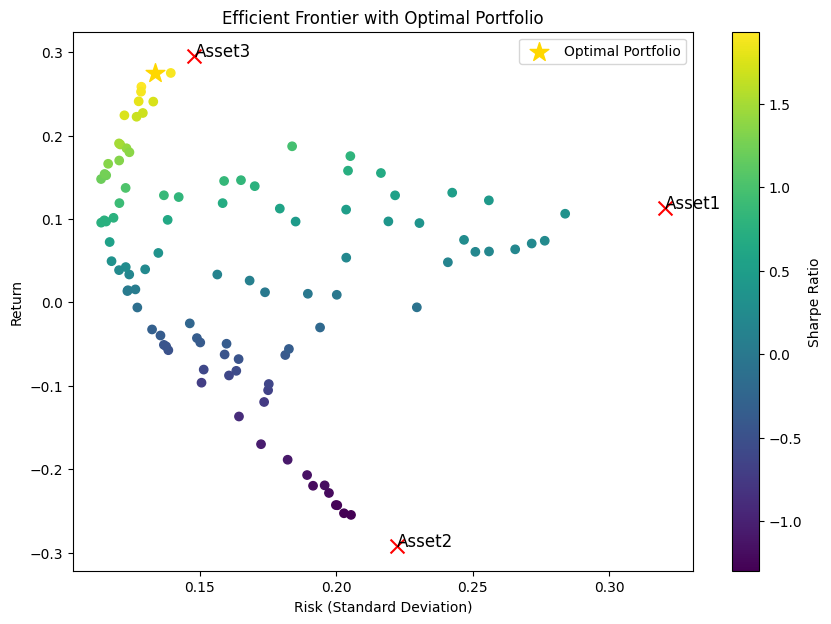

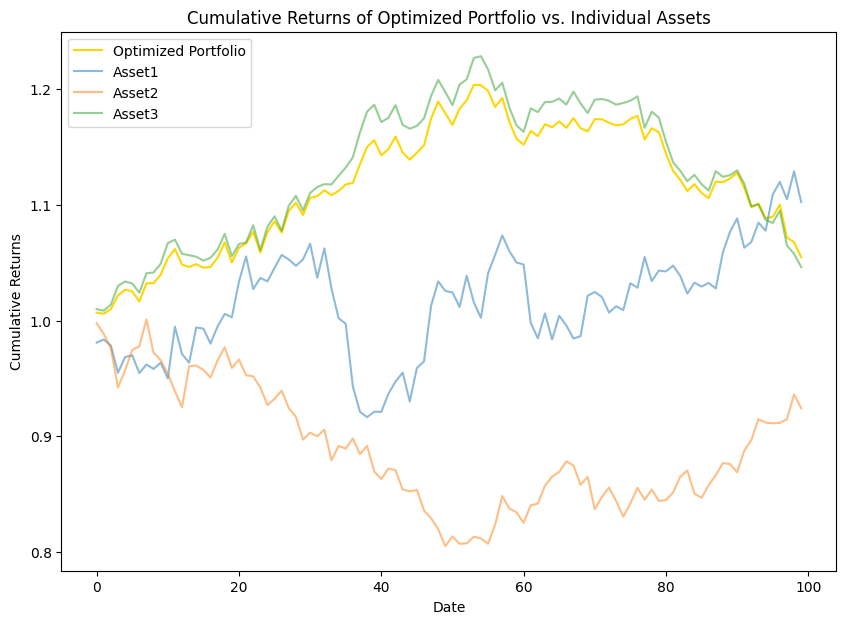

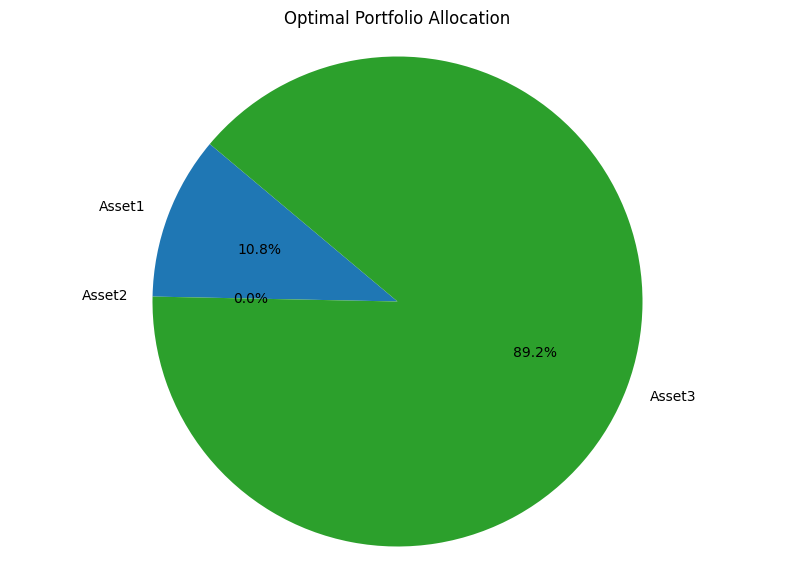

Out-of-Sample Sharpe Ratio: -0.9981571746591233


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sample in-sample and out-of-sample data (replace with actual data)
in_sample_data = pd.DataFrame({
    'Asset1': np.random.normal(0.001, 0.02, 252),
    'Asset2': np.random.normal(0.001, 0.015, 252),
    'Asset3': np.random.normal(0.001, 0.01, 252)
})

out_of_sample_data = pd.DataFrame({
    'Asset1': np.random.normal(0.001, 0.02, 100),
    'Asset2': np.random.normal(0.001, 0.015, 100),
    'Asset3': np.random.normal(0.001, 0.01, 100)
})

# Calculate expected returns and covariance matrix for in-sample data
expected_returns = in_sample_data.mean() * 252
cov_matrix = in_sample_data.cov() * 252

# Define portfolio performance function
def portfolio_performance(weights, returns, cov_matrix):
    port_return = np.dot(weights, returns)
    port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return port_return, port_variance

# Define optimization function for Sharpe ratio
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0):
    port_return, port_variance = portfolio_performance(weights, returns, cov_matrix)
    return -(port_return - risk_free_rate) / np.sqrt(port_variance)

# Constraints and bounds for optimization
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(len(expected_returns)))
init_guess = np.array([1./len(expected_returns)] * len(expected_returns))

# Optimize for maximum Sharpe ratio
opt_results = minimize(negative_sharpe_ratio, init_guess, args=(expected_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = opt_results.x

# Calculate out-of-sample performance
r_bar = out_of_sample_data.mean()
Sigma = out_of_sample_data.cov()

# Actual average returns and covariance of the portfolio
actual_avg_return = np.dot(optimal_weights, r_bar)
actual_covariance = np.dot(optimal_weights.T, np.dot(Sigma, optimal_weights))

print(f'Actual Average Return: {actual_avg_return}')
print(f'Actual Portfolio Variance: {actual_covariance}')

# Calculate efficient frontier for different target returns
num_points = 100
results = np.zeros((3, num_points))

for i in range(num_points):
    w = np.random.dirichlet(np.ones(len(expected_returns)))
    port_return, port_variance = portfolio_performance(w, expected_returns, cov_matrix)
    results[0, i] = port_return
    results[1, i] = np.sqrt(port_variance)
    results[2, i] = (port_return - 0.01) / np.sqrt(port_variance)

plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], marker='o')
plt.colorbar(label='Sharpe Ratio')

# Plot individual assets
for i, txt in enumerate(expected_returns.index):
    plt.scatter(np.sqrt(cov_matrix.iloc[i, i]), expected_returns[i], marker='x', color='red', s=100)
    plt.text(np.sqrt(cov_matrix.iloc[i, i]), expected_returns[i], txt, fontsize=12)

# Plot optimal portfolio
opt_return, opt_variance = portfolio_performance(optimal_weights, expected_returns, cov_matrix)
plt.scatter(np.sqrt(opt_variance), opt_return, marker='*', color='gold', s=200, label='Optimal Portfolio')

plt.title('Efficient Frontier with Optimal Portfolio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()

# Calculate cumulative returns
cumulative_returns_in_sample = (1 + in_sample_data).cumprod()
cumulative_returns_out_of_sample = (1 + out_of_sample_data).cumprod()

# Calculate cumulative returns for the optimal portfolio
in_sample_opt_portfolio_returns = np.dot(in_sample_data, optimal_weights)
out_of_sample_opt_portfolio_returns = np.dot(out_of_sample_data, optimal_weights)
cumulative_opt_portfolio_in_sample = (1 + in_sample_opt_portfolio_returns).cumprod()
cumulative_opt_portfolio_out_of_sample = (1 + out_of_sample_opt_portfolio_returns).cumprod()

plt.figure(figsize=(10, 7))
plt.plot(cumulative_returns_out_of_sample.index, cumulative_opt_portfolio_out_of_sample, label='Optimized Portfolio', color='gold')
plt.plot(cumulative_returns_out_of_sample, alpha=0.5)
plt.title('Cumulative Returns of Optimized Portfolio vs. Individual Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Optimized Portfolio'] + list(out_of_sample_data.columns), loc='upper left')
plt.show()

# Plot portfolio allocation
plt.figure(figsize=(10, 7))
plt.pie(optimal_weights, labels=expected_returns.index, autopct='%1.1f%%', startangle=140)
plt.title('Optimal Portfolio Allocation')
plt.axis('equal')
plt.show()

# Calculate Sharpe ratio for out-of-sample data
out_of_sample_sharpe_ratio = (actual_avg_return - 0.01) / np.sqrt(actual_covariance)

print(f'Out-of-Sample Sharpe Ratio: {out_of_sample_sharpe_ratio}')
